#  Adding Noise layer in the model

In [8]:
from tensorflow.keras.layers import GaussianNoise
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb




In [9]:
data = pd.read_csv('datasets_heart_noheader.csv')
data.head()

,63,1,3,145,233,1.1,0,150,0.1,2.3,0.2,0.3,1.2,1.3
0,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
1,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
2,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
3,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
4,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


           63         1         3  ...       0.3       1.2       1.3
63   1.000000 -0.100823 -0.075475  ...  0.279234  0.075468 -0.228983
1   -0.100823  1.000000 -0.054194  ...  0.120066  0.216715 -0.283609
3   -0.075475 -0.054194  1.000000  ... -0.177684 -0.149807  0.431205
145  0.277627 -0.058593  0.042935  ...  0.103384  0.068235 -0.147592
233  0.214832 -0.197507 -0.075728  ...  0.069971  0.097740 -0.084589
1.1  0.115026  0.040045  0.080077  ...  0.145150 -0.015243 -0.035686
0   -0.113400 -0.056065  0.051410  ... -0.074610 -0.019319  0.140706
150 -0.399170 -0.044089  0.297586  ... -0.213321 -0.097074  0.422279
0.1  0.099226  0.143460 -0.392581  ...  0.114280  0.203521 -0.435601
2.3  0.207301  0.093897 -0.157661  ...  0.225888  0.220098 -0.435444
0.2 -0.163291 -0.025823  0.136629  ... -0.086351 -0.122942  0.356320
0.3  0.279234  0.120066 -0.177684  ...  1.000000  0.148009 -0.390431
1.2  0.075468  0.216715 -0.149807  ...  0.148009  1.000000 -0.340604
1.3 -0.228983 -0.283609  0.431205 

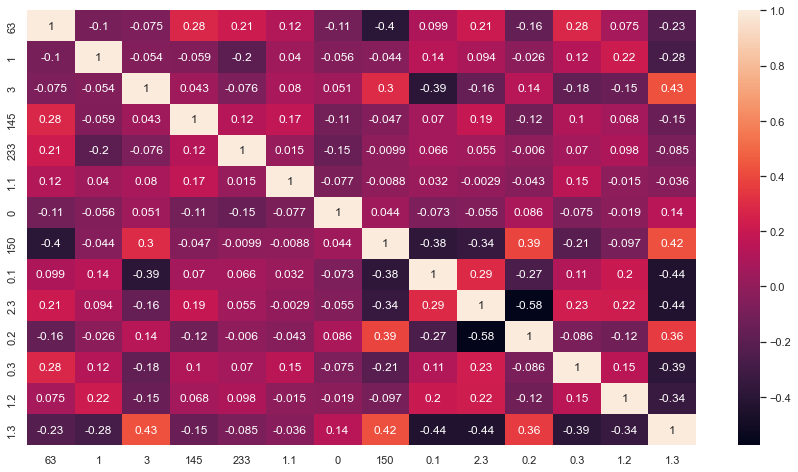

In [10]:
cor = data.corr()
print(cor)
sb.set(rc = {'figure.figsize':(15,8)})
sb.heatmap(cor, annot=True, )
plt.show()

In [11]:
Input = data.iloc[:, 0:13].values
Output = data.iloc[:, 13].values

x_train, x_test, y_train, y_test = train_test_split(Input, Output, random_state=2, test_size=0.2)

In [12]:
NoiseModel = Sequential()

NoiseModel.add(Dense(13, input_dim=13, activation='relu'))
NoiseModel.add(GaussianNoise(0.2))
NoiseModel.add(Dense(32, activation='relu'))
NoiseModel.add(Dense(1, activation='sigmoid'))

NoiseModel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
NoiseModel.fit(x_train, y_train, epochs=600, batch_size=10)

2022-06-15 23:05:19.524683: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/600
25/25 [==============================] - 0s 759us/step - loss: 1.5963 - accuracy: 0.5851
Epoch 2/600
25/25 [==============================] - 0s 667us/step - loss: 0.8426 - accuracy: 0.6722
Epoch 3/600
25/25 [==============================] - 0s 648us/step - loss: 0.8524 - accuracy: 0.6183
Epoch 4/600
25/25 [==============================] - 0s 664us/step - loss: 0.7310 - accuracy: 0.6598
Epoch 5/600
25/25 [==============================] - 0s 627us/step - loss: 0.6961 - accuracy: 0.6598
Epoch 6/600
25/25 [==============================] - 0s 609us/step - loss: 0.7471 - accuracy: 0.6266
Epoch 7/600
25/25 [==============================] - 0s 610us/step - loss: 0.7198 - accuracy: 0.6556
Epoch 8/600
25/25 [==============================] - 0s 617us/step - loss: 0.6882 - accuracy: 0.6515
Epoch 9/600
25/25 [==============================] - 0s 610us/step - loss: 0.6373 - accuracy: 0.6929
Epoch 10/600
25/25 [==============================] - 0s 627us/step - loss: 0.6359 - accura

25/25 [==============================] - 0s 567us/step - loss: 0.4412 - accuracy: 0.7801
Epoch 82/600
25/25 [==============================] - 0s 635us/step - loss: 0.4179 - accuracy: 0.7676
Epoch 83/600
25/25 [==============================] - 0s 610us/step - loss: 0.4311 - accuracy: 0.7967
Epoch 84/600
25/25 [==============================] - 0s 598us/step - loss: 0.6922 - accuracy: 0.6680
Epoch 85/600
25/25 [==============================] - 0s 604us/step - loss: 0.4552 - accuracy: 0.7925
Epoch 86/600
25/25 [==============================] - 0s 616us/step - loss: 0.5361 - accuracy: 0.7593
Epoch 87/600
25/25 [==============================] - 0s 602us/step - loss: 0.4227 - accuracy: 0.8174
Epoch 88/600
25/25 [==============================] - 0s 589us/step - loss: 0.4239 - accuracy: 0.7925
Epoch 89/600
25/25 [==============================] - 0s 595us/step - loss: 0.4694 - accuracy: 0.7676
Epoch 90/600
25/25 [==============================] - 0s 598us/step - loss: 0.5198 - accuracy: 

25/25 [==============================] - 0s 568us/step - loss: 0.5709 - accuracy: 0.7427
Epoch 161/600
25/25 [==============================] - 0s 569us/step - loss: 0.3914 - accuracy: 0.8216
Epoch 162/600
25/25 [==============================] - 0s 568us/step - loss: 0.3642 - accuracy: 0.8672
Epoch 163/600
25/25 [==============================] - 0s 594us/step - loss: 0.4227 - accuracy: 0.8216
Epoch 164/600
25/25 [==============================] - 0s 628us/step - loss: 0.3792 - accuracy: 0.8299
Epoch 165/600
25/25 [==============================] - 0s 617us/step - loss: 0.3872 - accuracy: 0.8506
Epoch 166/600
25/25 [==============================] - 0s 617us/step - loss: 0.3924 - accuracy: 0.8299
Epoch 167/600
25/25 [==============================] - 0s 628us/step - loss: 0.3801 - accuracy: 0.8465
Epoch 168/600
25/25 [==============================] - 0s 619us/step - loss: 0.3626 - accuracy: 0.8506
Epoch 169/600
25/25 [==============================] - 0s 612us/step - loss: 0.3845 - a

25/25 [==============================] - 0s 604us/step - loss: 0.4287 - accuracy: 0.8133
Epoch 240/600
25/25 [==============================] - 0s 577us/step - loss: 0.4540 - accuracy: 0.8216
Epoch 241/600
25/25 [==============================] - 0s 624us/step - loss: 0.4660 - accuracy: 0.7884
Epoch 242/600
25/25 [==============================] - 0s 621us/step - loss: 0.4947 - accuracy: 0.7801
Epoch 243/600
25/25 [==============================] - 0s 605us/step - loss: 0.3559 - accuracy: 0.8672
Epoch 244/600
25/25 [==============================] - 0s 600us/step - loss: 0.3435 - accuracy: 0.8506
Epoch 245/600
25/25 [==============================] - 0s 595us/step - loss: 0.3536 - accuracy: 0.8423
Epoch 246/600
25/25 [==============================] - 0s 596us/step - loss: 0.4287 - accuracy: 0.8216
Epoch 247/600
25/25 [==============================] - 0s 573us/step - loss: 0.3506 - accuracy: 0.8299
Epoch 248/600
25/25 [==============================] - 0s 569us/step - loss: 0.3782 - a

25/25 [==============================] - 0s 617us/step - loss: 0.4139 - accuracy: 0.8257
Epoch 319/600
25/25 [==============================] - 0s 607us/step - loss: 0.3601 - accuracy: 0.8382
Epoch 320/600
25/25 [==============================] - 0s 567us/step - loss: 0.4353 - accuracy: 0.7925
Epoch 321/600
25/25 [==============================] - 0s 655us/step - loss: 0.3448 - accuracy: 0.8423
Epoch 322/600
25/25 [==============================] - 0s 606us/step - loss: 0.3773 - accuracy: 0.8340
Epoch 323/600
25/25 [==============================] - 0s 601us/step - loss: 0.3525 - accuracy: 0.8714
Epoch 324/600
25/25 [==============================] - 0s 629us/step - loss: 0.3564 - accuracy: 0.8423
Epoch 325/600
25/25 [==============================] - 0s 654us/step - loss: 0.3611 - accuracy: 0.8465
Epoch 326/600
25/25 [==============================] - 0s 595us/step - loss: 0.4182 - accuracy: 0.7967
Epoch 327/600
25/25 [==============================] - 0s 597us/step - loss: 0.3722 - a

25/25 [==============================] - 0s 587us/step - loss: 0.3348 - accuracy: 0.8548
Epoch 398/600
25/25 [==============================] - 0s 635us/step - loss: 0.3430 - accuracy: 0.8589
Epoch 399/600
25/25 [==============================] - 0s 618us/step - loss: 0.3421 - accuracy: 0.8506
Epoch 400/600
25/25 [==============================] - 0s 609us/step - loss: 0.3313 - accuracy: 0.8631
Epoch 401/600
25/25 [==============================] - 0s 613us/step - loss: 0.3989 - accuracy: 0.8340
Epoch 402/600
25/25 [==============================] - 0s 610us/step - loss: 0.3886 - accuracy: 0.8382
Epoch 403/600
25/25 [==============================] - 0s 612us/step - loss: 0.3096 - accuracy: 0.8548
Epoch 404/600
25/25 [==============================] - 0s 600us/step - loss: 0.4750 - accuracy: 0.8008
Epoch 405/600
25/25 [==============================] - 0s 597us/step - loss: 0.3977 - accuracy: 0.8506
Epoch 406/600
25/25 [==============================] - 0s 598us/step - loss: 0.3424 - a

25/25 [==============================] - 0s 550us/step - loss: 0.4691 - accuracy: 0.7842
Epoch 477/600
25/25 [==============================] - 0s 559us/step - loss: 0.3432 - accuracy: 0.8257
Epoch 478/600
25/25 [==============================] - 0s 579us/step - loss: 0.3540 - accuracy: 0.8506
Epoch 479/600
25/25 [==============================] - 0s 591us/step - loss: 0.3587 - accuracy: 0.8755
Epoch 480/600
25/25 [==============================] - 0s 552us/step - loss: 0.4224 - accuracy: 0.8050
Epoch 481/600
25/25 [==============================] - 0s 603us/step - loss: 0.4085 - accuracy: 0.8257
Epoch 482/600
25/25 [==============================] - 0s 595us/step - loss: 0.3506 - accuracy: 0.8423
Epoch 483/600
25/25 [==============================] - 0s 653us/step - loss: 0.3486 - accuracy: 0.8589
Epoch 484/600
25/25 [==============================] - 0s 597us/step - loss: 0.3767 - accuracy: 0.8340
Epoch 485/600
25/25 [==============================] - 0s 596us/step - loss: 0.3592 - a

25/25 [==============================] - 0s 571us/step - loss: 0.3441 - accuracy: 0.8340
Epoch 556/600
25/25 [==============================] - 0s 555us/step - loss: 0.3289 - accuracy: 0.8589
Epoch 557/600
25/25 [==============================] - 0s 589us/step - loss: 0.3314 - accuracy: 0.8548
Epoch 558/600
25/25 [==============================] - 0s 602us/step - loss: 0.3258 - accuracy: 0.8548
Epoch 559/600
25/25 [==============================] - 0s 552us/step - loss: 0.3518 - accuracy: 0.8506
Epoch 560/600
25/25 [==============================] - 0s 569us/step - loss: 0.3248 - accuracy: 0.8589
Epoch 561/600
25/25 [==============================] - 0s 567us/step - loss: 0.3296 - accuracy: 0.8631
Epoch 562/600
25/25 [==============================] - 0s 565us/step - loss: 0.3419 - accuracy: 0.8465
Epoch 563/600
25/25 [==============================] - 0s 593us/step - loss: 0.3530 - accuracy: 0.8465
Epoch 564/600
25/25 [==============================] - 0s 596us/step - loss: 0.3897 - a

In [13]:
NoiseL, NoiseA = NoiseModel.evaluate(x_train, y_train, verbose=1)
NoiseLt, NoiseAt = NoiseModel.evaluate(x_test, y_test, verbose=1)

print(f'\nNoise model train accuracy = {NoiseA*100}\n')
print(f'Noise model test accuracy = {NoiseAt*100}')

2/2 [==============================] - 0s 1ms/step - loss: 0.4800 - accuracy: 0.7869

Noise model train accuracy = 85.06224155426025

Noise model test accuracy = 78.68852615356445


# Normal model

In [14]:
NormalModel = Sequential()

NormalModel.add(Dense(13, input_dim=13, activation='relu'))
# NormalModel.add(GaussianNoise(0.2))     # just removing the Noise
NormalModel.add(Dense(32, activation='relu'))
NormalModel.add(Dense(1, activation='sigmoid'))

NormalModel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
NormalModel.fit(x_train, y_train, epochs=600, batch_size=10)

Epoch 1/600
25/25 [==============================] - 0s 668us/step - loss: 5.5197 - accuracy: 0.4398
Epoch 2/600
25/25 [==============================] - 0s 748us/step - loss: 2.6409 - accuracy: 0.3651
Epoch 3/600
25/25 [==============================] - 0s 664us/step - loss: 1.5441 - accuracy: 0.4398
Epoch 4/600
25/25 [==============================] - 0s 643us/step - loss: 1.2375 - accuracy: 0.4979
Epoch 5/600
25/25 [==============================] - 0s 594us/step - loss: 0.8046 - accuracy: 0.5519
Epoch 6/600
25/25 [==============================] - 0s 601us/step - loss: 0.6813 - accuracy: 0.6473
Epoch 7/600
25/25 [==============================] - 0s 600us/step - loss: 0.7464 - accuracy: 0.6349
Epoch 8/600
25/25 [==============================] - 0s 591us/step - loss: 0.7388 - accuracy: 0.6722
Epoch 9/600
25/25 [==============================] - 0s 602us/step - loss: 0.7176 - accuracy: 0.6515
Epoch 10/600
25/25 [==============================] - 0s 612us/step - loss: 0.6221 - accura

25/25 [==============================] - 0s 586us/step - loss: 0.5101 - accuracy: 0.7967
Epoch 82/600
25/25 [==============================] - 0s 568us/step - loss: 0.8258 - accuracy: 0.6680
Epoch 83/600
25/25 [==============================] - 0s 570us/step - loss: 0.4450 - accuracy: 0.8174
Epoch 84/600
25/25 [==============================] - 0s 639us/step - loss: 0.3908 - accuracy: 0.8299
Epoch 85/600
25/25 [==============================] - 0s 590us/step - loss: 0.4532 - accuracy: 0.8008
Epoch 86/600
25/25 [==============================] - 0s 610us/step - loss: 0.4081 - accuracy: 0.8216
Epoch 87/600
25/25 [==============================] - 0s 612us/step - loss: 0.4496 - accuracy: 0.8174
Epoch 88/600
25/25 [==============================] - 0s 620us/step - loss: 0.5916 - accuracy: 0.7552
Epoch 89/600
25/25 [==============================] - 0s 570us/step - loss: 0.3973 - accuracy: 0.8299
Epoch 90/600
25/25 [==============================] - 0s 569us/step - loss: 0.4215 - accuracy: 

25/25 [==============================] - 0s 561us/step - loss: 0.4940 - accuracy: 0.7925
Epoch 161/600
25/25 [==============================] - 0s 560us/step - loss: 0.3992 - accuracy: 0.8423
Epoch 162/600
25/25 [==============================] - 0s 586us/step - loss: 0.4746 - accuracy: 0.7967
Epoch 163/600
25/25 [==============================] - 0s 568us/step - loss: 0.3994 - accuracy: 0.8257
Epoch 164/600
25/25 [==============================] - 0s 584us/step - loss: 0.3748 - accuracy: 0.8465
Epoch 165/600
25/25 [==============================] - 0s 585us/step - loss: 0.3556 - accuracy: 0.8548
Epoch 166/600
25/25 [==============================] - 0s 581us/step - loss: 0.4111 - accuracy: 0.8257
Epoch 167/600
25/25 [==============================] - 0s 614us/step - loss: 0.5548 - accuracy: 0.7593
Epoch 168/600
25/25 [==============================] - 0s 596us/step - loss: 0.3848 - accuracy: 0.8382
Epoch 169/600
25/25 [==============================] - 0s 621us/step - loss: 0.4173 - a

25/25 [==============================] - 0s 578us/step - loss: 0.4524 - accuracy: 0.8008
Epoch 240/600
25/25 [==============================] - 0s 615us/step - loss: 0.4557 - accuracy: 0.8299
Epoch 241/600
25/25 [==============================] - 0s 630us/step - loss: 0.4377 - accuracy: 0.8133
Epoch 242/600
25/25 [==============================] - 0s 606us/step - loss: 0.3716 - accuracy: 0.8465
Epoch 243/600
25/25 [==============================] - 0s 589us/step - loss: 0.3964 - accuracy: 0.8465
Epoch 244/600
25/25 [==============================] - 0s 597us/step - loss: 0.3876 - accuracy: 0.8382
Epoch 245/600
25/25 [==============================] - 0s 564us/step - loss: 0.3546 - accuracy: 0.8340
Epoch 246/600
25/25 [==============================] - 0s 576us/step - loss: 0.5993 - accuracy: 0.7510
Epoch 247/600
25/25 [==============================] - 0s 580us/step - loss: 0.4857 - accuracy: 0.7884
Epoch 248/600
25/25 [==============================] - 0s 593us/step - loss: 0.3911 - a

25/25 [==============================] - 0s 565us/step - loss: 0.3768 - accuracy: 0.8257
Epoch 319/600
25/25 [==============================] - 0s 588us/step - loss: 0.4547 - accuracy: 0.7801
Epoch 320/600
25/25 [==============================] - 0s 561us/step - loss: 0.4141 - accuracy: 0.8257
Epoch 321/600
25/25 [==============================] - 0s 610us/step - loss: 0.4907 - accuracy: 0.8008
Epoch 322/600
25/25 [==============================] - 0s 609us/step - loss: 0.3797 - accuracy: 0.8382
Epoch 323/600
25/25 [==============================] - 0s 613us/step - loss: 0.4385 - accuracy: 0.8008
Epoch 324/600
25/25 [==============================] - 0s 589us/step - loss: 0.3513 - accuracy: 0.8465
Epoch 325/600
25/25 [==============================] - 0s 572us/step - loss: 0.4141 - accuracy: 0.8257
Epoch 326/600
25/25 [==============================] - 0s 564us/step - loss: 0.3680 - accuracy: 0.8340
Epoch 327/600
25/25 [==============================] - 0s 561us/step - loss: 0.4702 - a

25/25 [==============================] - 0s 564us/step - loss: 0.3780 - accuracy: 0.8506
Epoch 398/600
25/25 [==============================] - 0s 607us/step - loss: 0.3514 - accuracy: 0.8548
Epoch 399/600
25/25 [==============================] - 0s 647us/step - loss: 0.3779 - accuracy: 0.8174
Epoch 400/600
25/25 [==============================] - 0s 621us/step - loss: 0.3841 - accuracy: 0.8465
Epoch 401/600
25/25 [==============================] - 0s 588us/step - loss: 0.3753 - accuracy: 0.8548
Epoch 402/600
25/25 [==============================] - 0s 609us/step - loss: 0.3624 - accuracy: 0.8465
Epoch 403/600
25/25 [==============================] - 0s 580us/step - loss: 0.3609 - accuracy: 0.8838
Epoch 404/600
25/25 [==============================] - 0s 568us/step - loss: 0.5176 - accuracy: 0.8050
Epoch 405/600
25/25 [==============================] - 0s 554us/step - loss: 0.4219 - accuracy: 0.8091
Epoch 406/600
25/25 [==============================] - 0s 549us/step - loss: 0.3782 - a

25/25 [==============================] - 0s 558us/step - loss: 0.3432 - accuracy: 0.8506
Epoch 477/600
25/25 [==============================] - 0s 561us/step - loss: 0.3659 - accuracy: 0.8299
Epoch 478/600
25/25 [==============================] - 0s 616us/step - loss: 0.3479 - accuracy: 0.8672
Epoch 479/600
25/25 [==============================] - 0s 567us/step - loss: 0.4197 - accuracy: 0.8133
Epoch 480/600
25/25 [==============================] - 0s 563us/step - loss: 0.4449 - accuracy: 0.8091
Epoch 481/600
25/25 [==============================] - 0s 560us/step - loss: 0.3436 - accuracy: 0.8548
Epoch 482/600
25/25 [==============================] - 0s 563us/step - loss: 0.3518 - accuracy: 0.8672
Epoch 483/600
25/25 [==============================] - 0s 581us/step - loss: 0.3735 - accuracy: 0.8423
Epoch 484/600
25/25 [==============================] - 0s 552us/step - loss: 0.4039 - accuracy: 0.8257
Epoch 485/600
25/25 [==============================] - 0s 565us/step - loss: 0.3507 - a

25/25 [==============================] - 0s 582us/step - loss: 0.3958 - accuracy: 0.8465
Epoch 556/600
25/25 [==============================] - 0s 550us/step - loss: 0.3301 - accuracy: 0.8589
Epoch 557/600
25/25 [==============================] - 0s 551us/step - loss: 0.3488 - accuracy: 0.8257
Epoch 558/600
25/25 [==============================] - 0s 581us/step - loss: 0.3191 - accuracy: 0.8506
Epoch 559/600
25/25 [==============================] - 0s 596us/step - loss: 0.4964 - accuracy: 0.7967
Epoch 560/600
25/25 [==============================] - 0s 587us/step - loss: 0.3565 - accuracy: 0.8465
Epoch 561/600
25/25 [==============================] - 0s 595us/step - loss: 0.3345 - accuracy: 0.8506
Epoch 562/600
25/25 [==============================] - 0s 574us/step - loss: 0.4051 - accuracy: 0.8299
Epoch 563/600
25/25 [==============================] - 0s 571us/step - loss: 0.3307 - accuracy: 0.8506
Epoch 564/600
25/25 [==============================] - 0s 584us/step - loss: 0.3618 - a

In [15]:
NormalL, NormalA = NormalModel.evaluate(x_train, y_train, verbose=1)
NormalLt, NormalAt = NormalModel.evaluate(x_test, y_test, verbose=1)

print(f'\nTraining Normal Model Accuracy{NormalA*100}\n')
print(f'Testing Normal Model Accuracy{NormalAt*100}')

2/2 [==============================] - 0s 1ms/step - loss: 0.6513 - accuracy: 0.7869

Training Normal Model Accuracy85.47717928886414

Testing Normal Model Accuracy78.68852615356445
